##**Multi-Class Classification**

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

###**Accessing the Dataset**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Checking the shape of the train and test data

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
X_tr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

###**Visualization of the data**

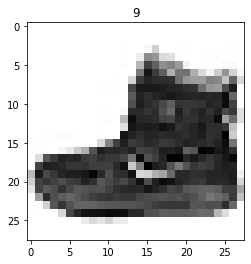

In [5]:
plt.imshow(X_tr[0], 'Greys')
plt.title(y_tr[0]);

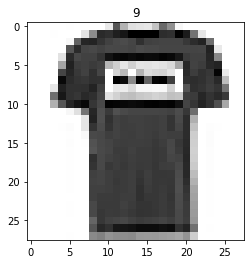

In [9]:
plt.imshow(X_tr[1], 'Greys')
plt.title(y_tr[0]);

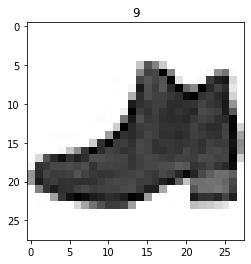

In [18]:
plt.imshow(X_tr[15], 'Greys')
plt.title(y_tr[0]);

###**Creating a dictionary of the fashion materials**

In [19]:
fashion_dict = {0	: 'T-shirt/top', 1 : 'Trouser', 2 :	'Pullover', 3	: 'Dress', 4	: 'Coat', 
                5	: 'Sandal', 6	: 'Shirt', 7	: 'Sneaker', 8	: 'Bag', 9	: 'Ankle boot'}

In [20]:
fashion_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

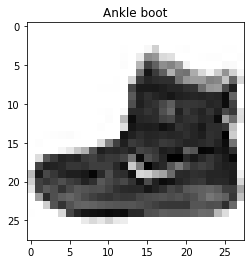

In [22]:
# Visualization of the fashion material incorporating the dictionary

plt.imshow(X_tr[0], 'Greys')
plt.title(fashion_dict[y_tr[0]]);

##**Building the model**

In [24]:
mod_1 = tf.keras.Sequential()

#Flattening of the pixels

mod_1.add(tf.keras.layers.Flatten())
mod_1.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_1.add(tf.keras.layers.Dense(10, activation = 'softmax'))
# softmax provides an output which is nothing but e^(the input value) / e^(sum of all inputs).
# Consequently, we get a probability at the output which lies between 0 and 1.

###**Compiling the model**

In [25]:
mod_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
# When we have multi-class classification, we make use of SparseCategoricalCrossentropy.

###**Training the model**

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 3.3806 - accuracy: 0.7374
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8053
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5163 - accuracy: 0.8201
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4908 - accuracy: 0.8261
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4946 - accuracy: 0.8292
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4694 - accuracy: 0.8349
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4647 - accuracy: 0.8369
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4507 - accuracy: 0.8417
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.441

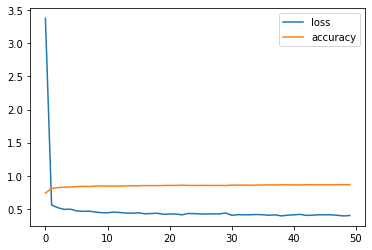

In [27]:
tf.random.set_seed(100)
history = mod_1.fit(X_tr, y_tr, epochs = 50)
hist = pd.DataFrame(history.history)
hist.plot();

###**Model Summary**

In [29]:
mod_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 300)                 235500    
                                                                 
 dense_1 (Dense)             (32, 10)                  3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


###**Model Evaluation**

In [33]:
test_loss, test_accuracy = mod_1.evaluate(X_te, y_te)

313/313 [==============================] - 1s 4ms/step - loss: 0.7298 - accuracy: 0.8388


In [31]:
print('Test Loss:', test_loss)

Test Loss: 0.7297934293746948


In [34]:
print ('Test Accuracy:', test_accuracy)

Test Accuracy: 0.8388000130653381


###**Improving the model**

In [35]:
# Building a new model

mod_2 = tf.keras.Sequential()
mod_2.add(tf.keras.layers.Flatten())
mod_2.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
mod_2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [36]:
# Compiling the new model

mod_2.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2530 - accuracy: 0.7698
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4925 - accuracy: 0.8300
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4449 - accuracy: 0.8418
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4187 - accuracy: 0.8517
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3995 - accuracy: 0.8584
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3867 - accuracy: 0.8638
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8682
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3659 - accuracy: 0.8710
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3561 - accuracy: 0.8743
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

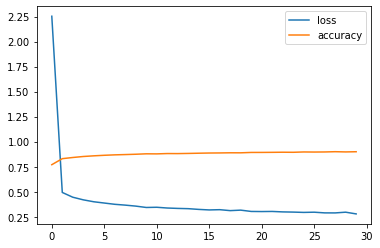

In [37]:
# Training the new model

tf.random.set_seed(100)
history = mod_2.fit(X_tr, y_tr, epochs = 30)
hist = pd.DataFrame(history.history)
hist.plot();

In [38]:
# Evaluating the new model

test_new_loss, test_new_accuracy = mod_2.evaluate(X_te, y_te)
print ("New Test Loss:", test_new_loss)
print ("New Test Accuracy:", test_new_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4975 - accuracy: 0.8691
New Test Loss: 0.497524619102478
New Test Accuracy: 0.8690999746322632


In [39]:
# New Model Summary

mod_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


###**Plotting the model**

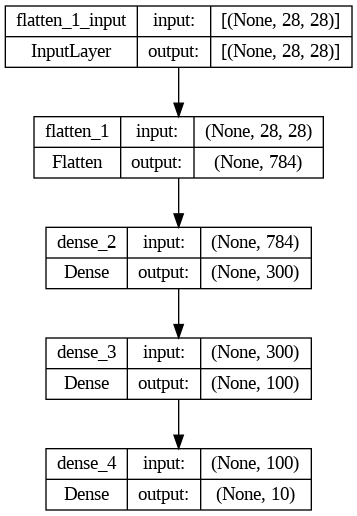

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(mod_2, show_shapes = True)

###**Predicting the model**

In [41]:
y_pred = mod_2.predict(X_te)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.9797193e-38, 0.0000000e+00, 6.2661126e-26, ..., 4.1722094e-05,
        3.0832426e-17, 9.9995285e-01],
       [5.6189965e-06, 2.6847415e-12, 9.9990255e-01, ..., 0.0000000e+00,
        1.4176309e-08, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.2120080e-31, 0.0000000e+00, 4.4483683e-32, ..., 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8368896e-04, 3.9873758e-13, 7.4117794e-04, ..., 2.5011969e-01,
        2.1784131e-03, 2.9636631e-02]], dtype=float32)

In [42]:
y_pred[0]

array([1.9797193e-38, 0.0000000e+00, 6.2661126e-26, 0.0000000e+00,
       0.0000000e+00, 5.3561935e-06, 1.0451946e-23, 4.1722094e-05,
       3.0832426e-17, 9.9995285e-01], dtype=float32)

In [43]:
np.argmax(y_pred[0])

9

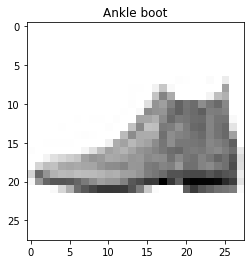

In [44]:
plt.imshow(X_te[0], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[0])]);

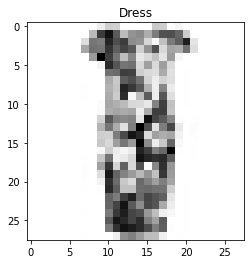

In [45]:
plt.imshow(X_te[100], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[100])]);

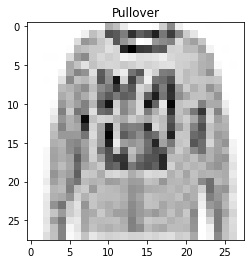

In [46]:
plt.imshow(X_te[500], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[500])]);

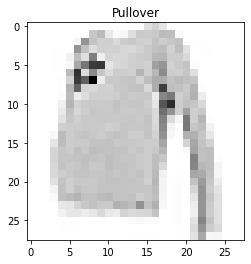

In [47]:
plt.imshow(X_te[600], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[600])]);

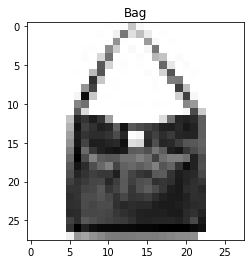

In [48]:
plt.imshow(X_te[700], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[700])]);

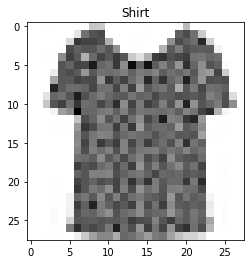

In [49]:
plt.imshow(X_te[1000], 'Greys')
plt.title(fashion_dict[np.argmax(y_pred[1000])]);